In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


'C:\Users\lenovo\anaconda3\anaconda' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

'C:\Users\lenovo\anaconda3\anaconda' is not recognized as an internal or external command,
operable program or batch file.
'C:\Users\lenovo\anaconda3\anaconda' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
covid = pd.read_csv ('ons_deaths_cqc_by_la.csv',parse_dates=['date'])
print (covid)

                  area_name       date cause_of_death  deaths
0      Barking and Dagenham 2021-01-01       COVID 19       0
1      Barking and Dagenham 2021-01-01   Non COVID 19       0
2      Barking and Dagenham 2021-01-02       COVID 19       0
3      Barking and Dagenham 2021-01-02   Non COVID 19       0
4      Barking and Dagenham 2021-01-03       COVID 19       0
...                     ...        ...            ...     ...
92695                  York 2021-11-03   Non COVID 19       1
92696                  York 2021-11-04       COVID 19       0
92697                  York 2021-11-04   Non COVID 19       2
92698                  York 2021-11-05       COVID 19       0
92699                  York 2021-11-05   Non COVID 19       2

[92700 rows x 4 columns]


In [8]:
matplotlib inline

In [10]:
def cm_to_inch(value):
    return value/2.54

In [13]:
covid_area = covid.loc[(covid['cause_of_death'] == 'COVID 19') & (covid['deaths'] >= 10)]
covid_area_group = covid_area.groupby('area_name')
covid_area_group.size()

area_name
Bournemouth, Christchurch and Poole     6
Buckinghamshire                         2
Cumbria                                 1
Devon                                   2
East Sussex                            18
Essex                                  19
Hampshire                              16
Hertfordshire                          13
Kent                                   22
Lancashire                              4
Norfolk                                16
Nottinghamshire                         2
Somerset                                3
South Gloucestershire                   1
Staffordshire                           2
Suffolk                                 3
Surrey                                 16
West Sussex                            12
Wirral                                  1
Wolverhampton                           1
Worcestershire                          2
dtype: int64

In [15]:
covid_totals = covid_area_group.sum()
covid_totals.sort_values(by='deaths').head()

,deaths
area_name,
Cumbria,11
South Gloucestershire,11
Wirral,12
Wolverhampton,12
Staffordshire,20


Text(0, 0.5, 'Deaths')

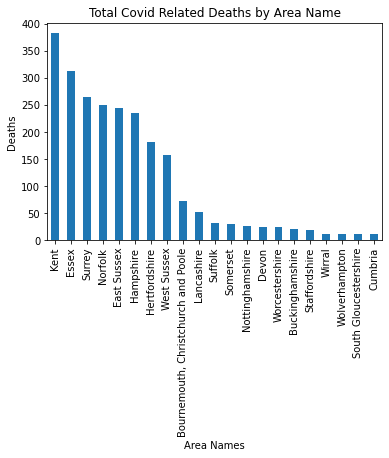

In [17]:
my_plot = covid_totals.sort_values(by='deaths',ascending=False).plot(kind='bar',legend=None,title="Total Covid Related Deaths by Area Name")
my_plot.set_xlabel("Area Names")
my_plot.set_ylabel("Deaths")

<BarContainer object of 92700 artists>

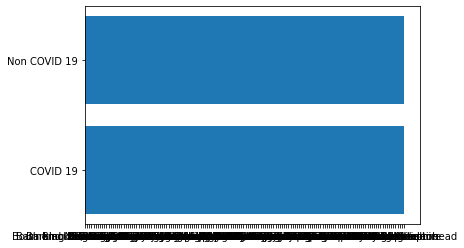

In [24]:
plt.barh(covid['cause_of_death'], covid['area_name'])
plt.s